In [1]:
# importing necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [2]:
## A function that uses plot to show original and output image
def plot_result(original,processed):
    plt.subplot(121),plt.imshow(original)
    plt.title('Original'),plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(processed,cmap='gray')
    plt.title("Output"),plt.xticks([]), plt.yticks([])
    plt.show()


In [3]:

# read a cracked sample image
img = cv2.imread('Input-Set/Lot1.tif')
## added to turn color back to normal
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## resizing
# img = cv2.resize(img, (100, 100))
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [15]:
## The gray scale doesn't seem to be giving someting nice
## maybe first filter the colors you want


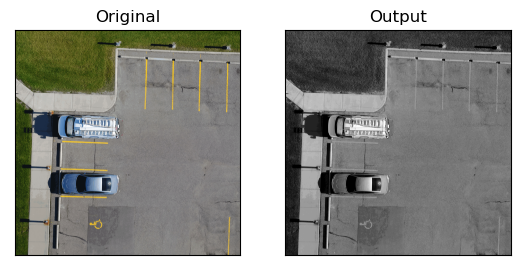

In [28]:

# Convert into gray scale
## These make the images easier to visualize the processed images in next steps.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_result(img,gray)
## The gray scale doesn't seem to be giving someting nice
## maybe first filter the colors you want

In [ ]:

# Image processing ( smoothing )
# Averaging
blur = cv2.blur(img,(3,3))
#show_result(blur)


In [ ]:
# Apply logarithmic transform
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255


In [ ]:

# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
#show_result(img_log)


In [ ]:

# Image smoothing: bilateral filter
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)
#show_result(bilateral)


In [ ]:

# Canny Edge Detection
edges = cv2.Canny(bilateral,100,200)
#show_result(edges)


In [ ]:

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

In [ ]:

# Create feature detecting method
# sift = cv2.xfeatures2d.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)


In [ ]:

# Make featured Image
keypoints, descriptors = orb.detectAndCompute(closing, None)
featuredImg = cv2.drawKeypoints(closing, keypoints, None)


In [ ]:

# Create an output image
cv2.imwrite('Output-Set/Detected_Lot1.tif', featuredImg)


In [ ]:
## ideas: 
